# Prepare data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from preparation import prepare_data, select_by_date_interval
from plotting import bar_plot_videos_per_h, get_videos_per_h_series

In [2]:
plt.rcParams['figure.dpi'] = 150 # make your graphs bigger

In [3]:
PATH = "C:/Users/San/Documents/CS projects/yt_activity_analysis/data/Takeout/YouTube and YouTube Music/history/watch-history.json"
df_full = prepare_data(PATH)

start_date = "2022-07-15"
end_date = "2022-08-22"
df = select_by_date_interval(df_full, start=start_date)
df

,video_title,channel_name,time
0,Іспанія,Andriy Kuzmenko - Topic,2022-08-25 15:17:57.231000+03:00
1,КОМУ ВНИЗ - Тютюнник,КОМУ ВНИЗ,2022-08-25 15:16:31.799000+03:00
2,Similar characters in video games - Darkwood,Viva La Dirt League,2022-08-25 14:50:28.594000+03:00
3,Скрябін — Порш пана мера [Official Video],Кузьма Скрябін,2022-08-25 14:22:44.488000+03:00
4,When the Horde enters Alliance territory in Wo...,Viva La Dirt League,2022-08-25 14:00:10.229000+03:00
...,...,...,...
1623,Deadman's Gun,Ashtar Command - Topic,2022-07-15 10:44:47.482000+03:00
1624,Subwoolfer - Give That Wolf A Banana - LIVE - ...,Eurovision Song Contest,2022-07-15 10:35:08.162000+03:00
1625,Zdob şi Zdub & Advahov Brothers - Trenulețul -...,Eurovision Song Contest,2022-07-15 10:32:11.558000+03:00
1626,Can US HIMARS Rocket Artillery Make a Difference?,Task & Purpose,2022-07-15 10:09:46.571000+03:00


# Count on how many videos you clicked per channel

In [4]:
counts = df["channel_name"].value_counts()
counts

Viva La Dirt League     64
STERNENKO               49
Історія Без Міфів       46
gameranx                29
КОМУ ВНИЗ               27
                        ..
Stomp on Shao            1
John Gaye                1
Fulcrum Fan Edits        1
IGRB                     1
Jamie Lidell - Topic     1
Name: channel_name, Length: 529, dtype: Int64

# Plot n most watched channels

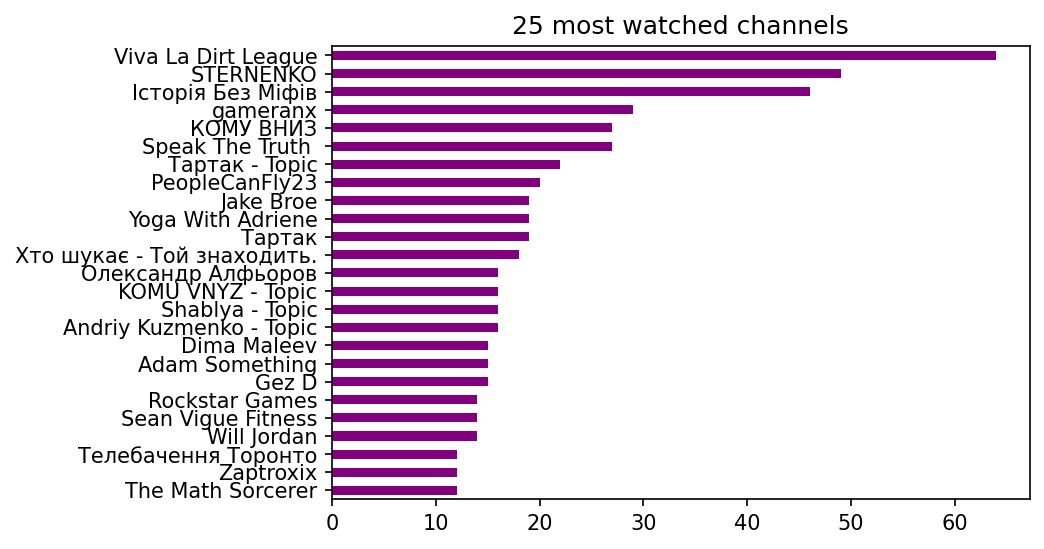

In [5]:
n = 25
top_n_channels = counts.iloc[:n]
ax = top_n_channels.plot(kind="barh", color="purple", title=f"{n} most watched channels")
ax.invert_yaxis()

In [6]:
top_n_channels

Viva La Dirt League           64
STERNENKO                     49
Історія Без Міфів             46
gameranx                      29
КОМУ ВНИЗ                     27
Speak The Truth               27
Тартак - Topic                22
PeopleCanFly23                20
Jake Broe                     19
Yoga With Adriene             19
Тартак                        19
Хто шукає - Той знаходить.    18
Олександр Алфьоров            16
KOMU VNYZ - Topic             16
Shablya - Topic               16
Andriy Kuzmenko - Topic       16
Dima Maleev                   15
Adam Something                15
Gez D                         15
Rockstar Games                14
Sean Vigue Fitness            14
Will Jordan                   14
Телебачення Торонто           12
Zaptroxix                     12
The Math Sorcerer             12
Name: channel_name, dtype: Int64

# Count on how many videos you clicked per hour

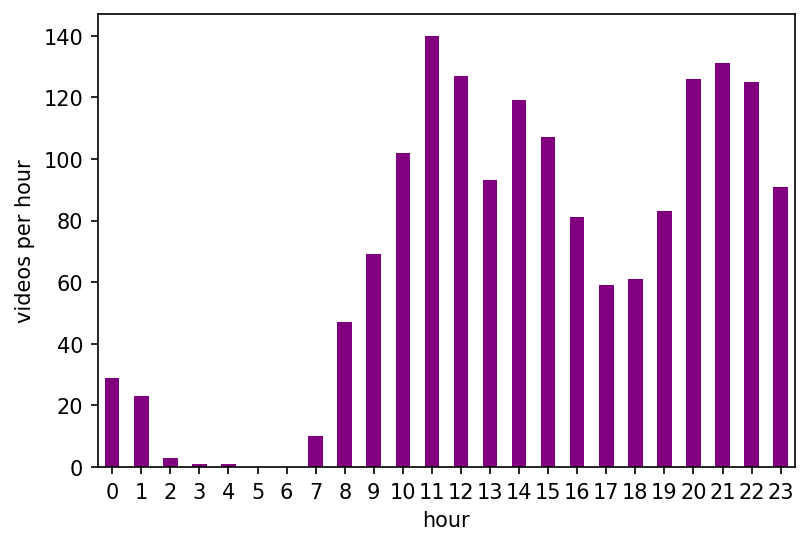

In [7]:
bar_plot_videos_per_h(df)

# Discover at what hours you watch a particular channel 

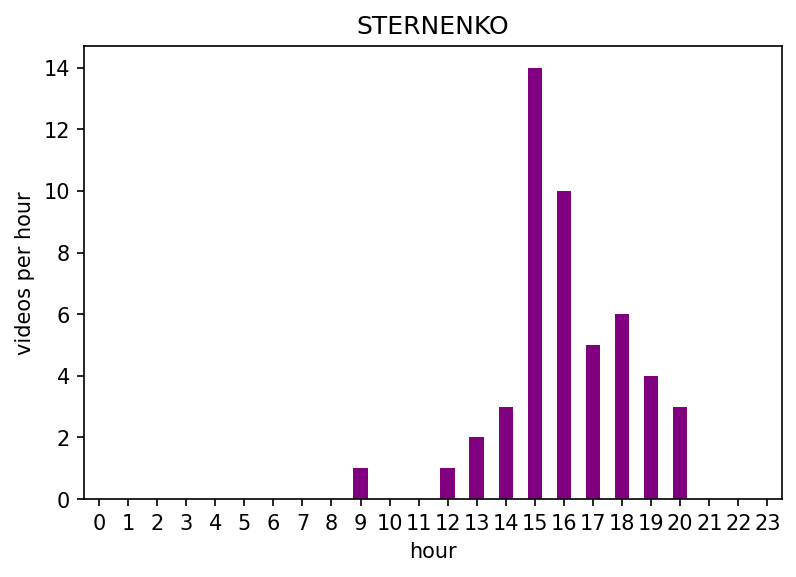

In [8]:
channel_name_to_look = "STERNENKO"
bar_plot_videos_per_h(df, channel_name_to_look)

# Plot videos count per hour for several channels

In [9]:
list_top_n_channels = top_n_channels.index.to_list()
list_top_n_channels

['Viva La Dirt League',
 'STERNENKO',
 'Історія Без Міфів',
 'gameranx',
 'КОМУ ВНИЗ',
 'Speak The Truth ',
 'Тартак - Topic',
 'PeopleCanFly23',
 'Jake Broe',
 'Yoga With Adriene',
 'Тартак',
 'Хто шукає - Той знаходить.',
 'Олександр Алфьоров',
 'KOMU VNYZ - Topic',
 'Shablya - Topic',
 'Andriy Kuzmenko - Topic',
 'Dima Maleev',
 'Adam Something',
 'Gez D',
 'Rockstar Games',
 'Sean Vigue Fitness',
 'Will Jordan',
 'Телебачення Торонто',
 'Zaptroxix',
 'The Math Sorcerer']

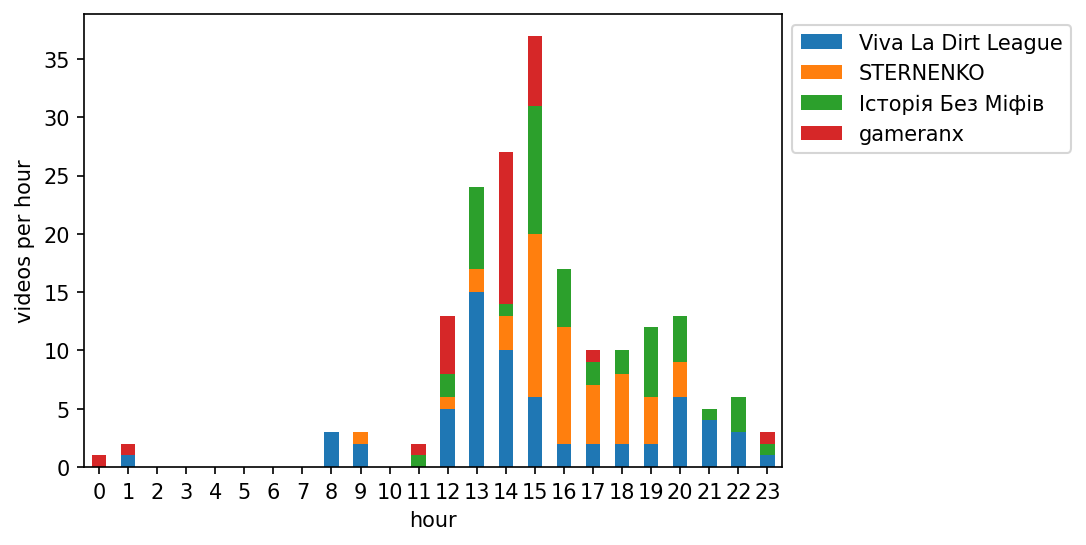

In [10]:
start_point = 0
interval = 4
end_point = start_point + interval

df_data = {f"{list_top_n_channels[start_point]}": get_videos_per_h_series(
    df, list_top_n_channels[start_point])}
df_top_n_channels = pd.DataFrame(data=df_data)
for i in range(start_point+1, end_point):
    df_top_n_channels[list_top_n_channels[i]] = get_videos_per_h_series(
        df, list_top_n_channels[i])
df_top_n_channels
df_top_n_channels.plot.bar(stacked=True, rot=0,
                           xlabel="hour", ylabel="videos per hour").legend(bbox_to_anchor=(1,1))

# Count how many videos you click per day of week

C:\Users\San\AppData\Local\Temp\ipykernel_10004\267179306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df['time'].dt.strftime('%a')


<AxesSubplot:>

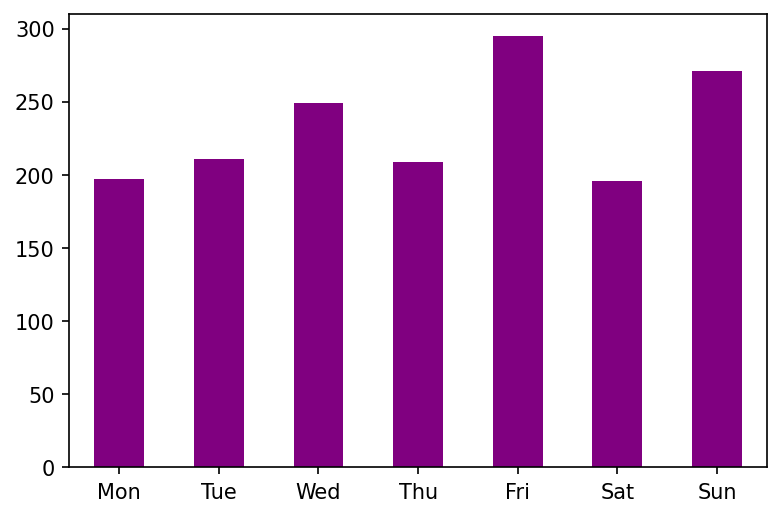

In [11]:
df['weekday'] = df['time'].dt.strftime('%a')
total = len(df["weekday"])
str_week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
videos_per_weekday = df["weekday"].value_counts()[str_week_days] # sort with custom index
videos_per_weekday.plot.bar(color="purple", rot=0)